# Dataset analysis with Stereopy

Followed [Quick Start (Square Bin)](https://stereopy.readthedocs.io/en/latest/Tutorials/clustering.html) tutorial

In [1]:
import warnings

warnings.filterwarnings('ignore')
import stereo as st

2023-01-13 15:09:58.461654: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
# read the gef file information
base_folder='./' # deNBI-biohackathon_2022 project folder
data_folder=base_folder+'input/stereopy_demo_data/'

mouse_data_path = data_folder+'SS200000135TL_D1.tissue.gef'
st.io.read_gef_info(mouse_data_path)

[2023-01-13 15:10:04][Stereo][222455][140144955553600][reader][618][INFO]: This is GEF file which contains traditional bin infomation.
[2023-01-13 15:10:04][Stereo][222455][140144955553600][reader][619][INFO]: bin_type: bins
[2023-01-13 15:10:04][Stereo][222455][140144955553600][reader][622][INFO]: Bin size list: ['bin1']
[2023-01-13 15:10:04][Stereo][222455][140144955553600][reader][628][INFO]: Resolution: 500
[2023-01-13 15:10:04][Stereo][222455][140144955553600][reader][631][INFO]: Gene count: 20816
[2023-01-13 15:10:04][Stereo][222455][140144955553600][reader][640][INFO]: offsetX: 0
[2023-01-13 15:10:04][Stereo][222455][140144955553600][reader][643][INFO]: offsetY: 2
[2023-01-13 15:10:04][Stereo][222455][140144955553600][reader][646][INFO]: Width: 13441
[2023-01-13 15:10:04][Stereo][222455][140144955553600][reader][649][INFO]: Height: 19774
[2023-01-13 15:10:04][Stereo][222455][140144955553600][reader][652][INFO]: Max Exp: 14


{'bin_list': ['bin1'],
 'resolution': 500,
 'gene_count': 20816,
 'offsetX': 0,
 'offsetY': 2,
 'width': 13441,
 'height': 19774,
 'maxExp': 14}

In [3]:
# read the gef file

data = st.io.read_gef(file_path=mouse_data_path, bin_size=50)

[2023-01-13 15:10:04][Stereo][222455][140144955553600][reader][518][INFO]: read_gef begin ...
[2023-01-13 15:10:04][Stereo][222455][140144955553600][reader][591][INFO]: the matrix has 35890 cells, and 20816 genes.


path:./input/stereopy_demo_data/SS200000135TL_D1.tissue.gef bin:50
               generateBinInfo - 1.867308 cpu sec


[2023-01-13 15:10:04][Stereo][222455][140144955553600][reader][599][INFO]: read_gef end.


In [4]:
type(data)

stereo.core.stereo_exp_data.StereoExpData

## Preprocessing

### Quality Checks

In [5]:
data.tl.cal_qc()

[2023-01-13 15:10:05][Stereo][222455][140144955553600][st_pipeline][40][INFO]: start to run cal_qc...
[2023-01-13 15:10:05][Stereo][222455][140144955553600][st_pipeline][43][INFO]: cal_qc end, consume time 0.0401s.


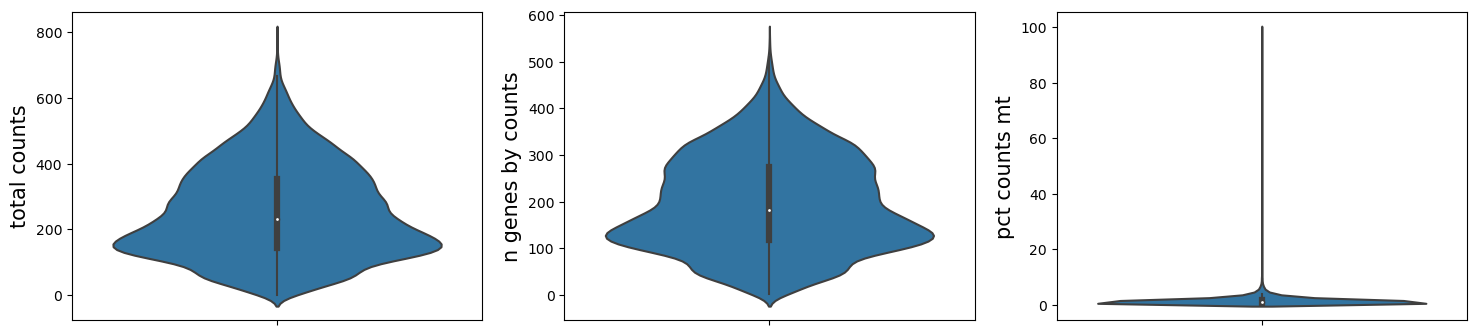

In [6]:
data.plt.violin()

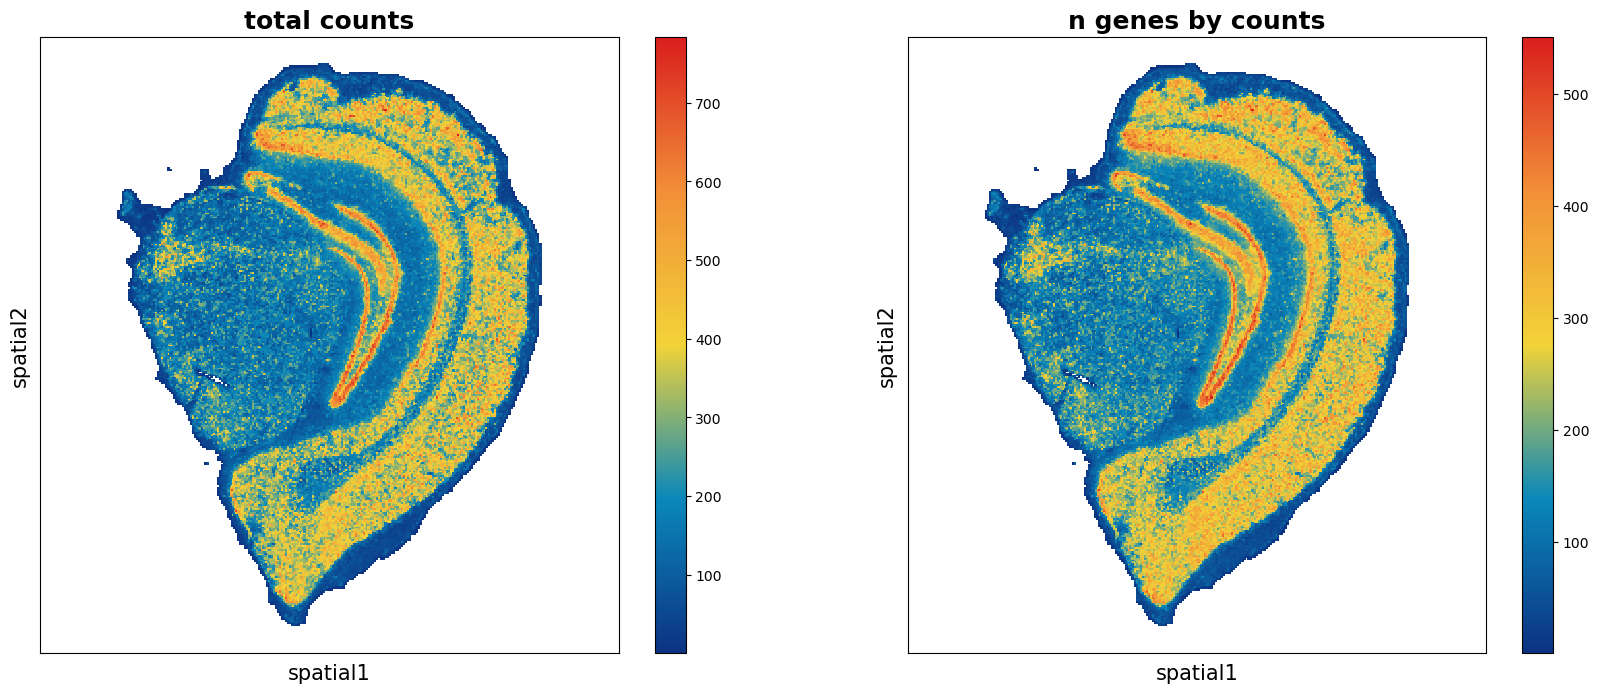

In [7]:
data.plt.spatial_scatter()

### Filtering

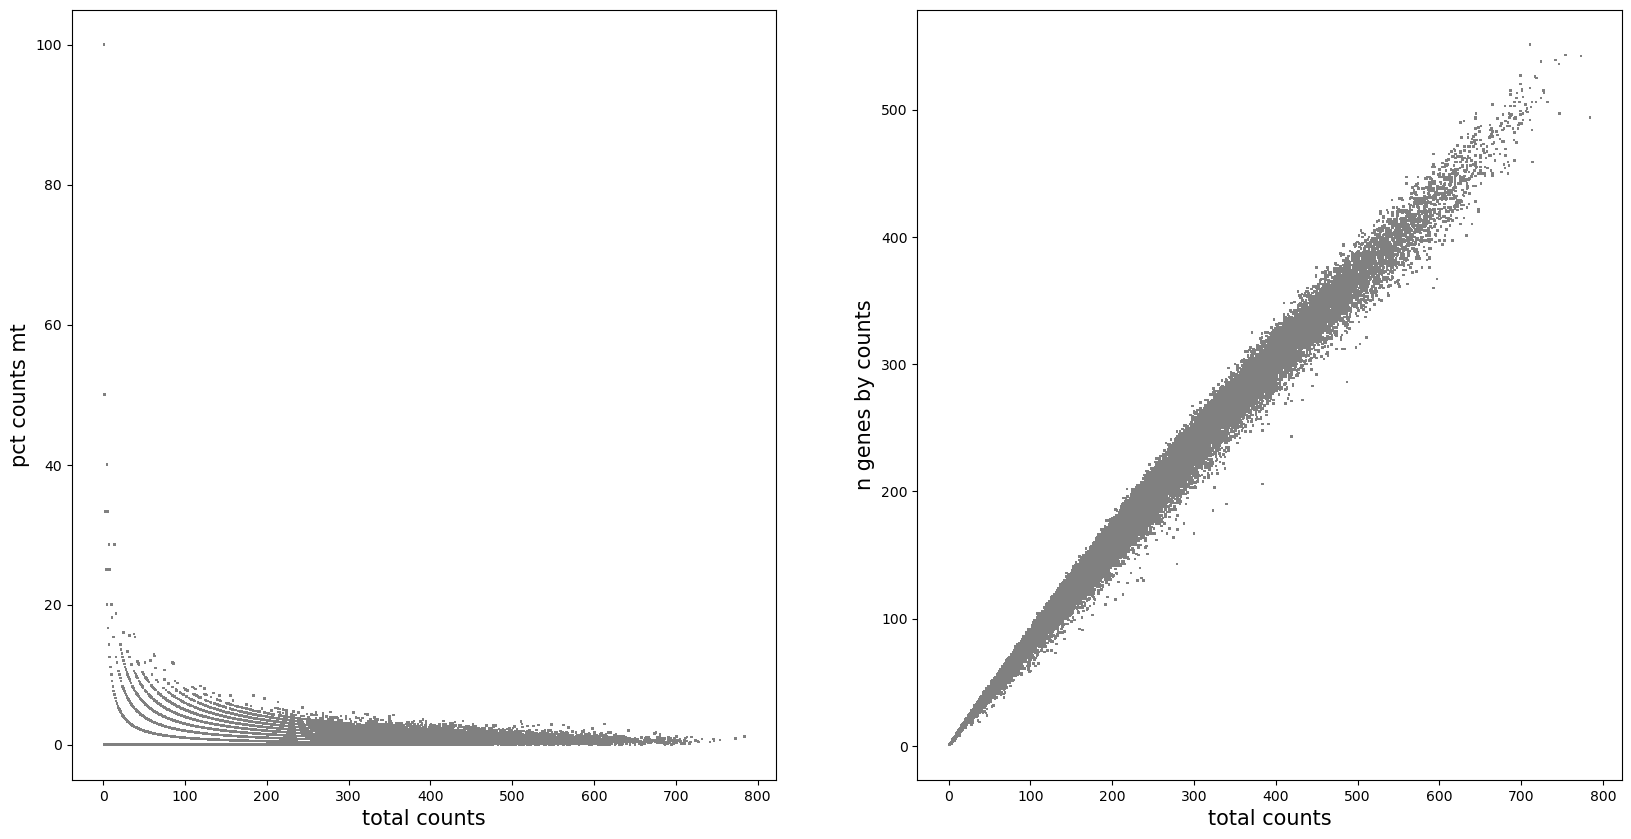

In [8]:
data.plt.genes_count()

In [9]:
data.tl.filter_cells(min_gene=20, min_n_genes_by_counts=3, pct_counts_mt=5, inplace=True)

[2023-01-13 15:10:07][Stereo][222455][140144955553600][st_pipeline][40][INFO]: start to run filter_cells...
[2023-01-13 15:10:07][Stereo][222455][140144955553600][st_pipeline][43][INFO]: filter_cells end, consume time 0.0343s.


### Normalization

In [10]:
data.tl.raw_checkpoint()

In [11]:
#data.tl.sctransform(res_key='sctransform', n_genes=2000, inplace=True)
data.tl.normalize_total(target_sum=10000)
data.tl.log1p()

[2023-01-13 15:10:07][Stereo][222455][140144955553600][st_pipeline][40][INFO]: start to run normalize_total...
[2023-01-13 15:10:07][Stereo][222455][140144955553600][st_pipeline][43][INFO]: normalize_total end, consume time 0.0370s.
[2023-01-13 15:10:07][Stereo][222455][140144955553600][st_pipeline][40][INFO]: start to run log1p...
[2023-01-13 15:10:07][Stereo][222455][140144955553600][st_pipeline][43][INFO]: log1p end, consume time 0.0126s.


## Highly Variable Genes

In [12]:
data.tl.highly_variable_genes(min_mean=0.0125, max_mean=3,min_disp=0.5,
                              n_top_genes=2000, res_key='highly_variable_genes')

[2023-01-13 15:10:07][Stereo][222455][140144955553600][st_pipeline][40][INFO]: start to run highly_variable_genes...
[2023-01-13 15:10:07][Stereo][222455][140144955553600][st_pipeline][43][INFO]: highly_variable_genes end, consume time 0.3735s.


In [13]:
data.tl.scale(max_value=10, zero_center=True)

[2023-01-13 15:10:07][Stereo][222455][140144955553600][st_pipeline][40][INFO]: start to run scale...
[2023-01-13 15:10:12][Stereo][222455][140144955553600][scale][52][INFO]: Truncate at max_value 10
[2023-01-13 15:10:12][Stereo][222455][140144955553600][st_pipeline][43][INFO]: scale end, consume time 4.9669s.


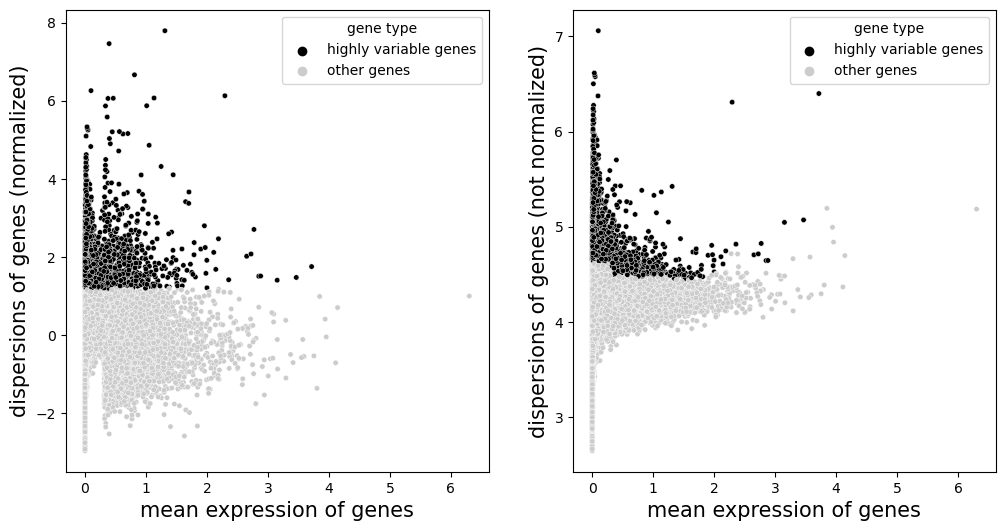

In [14]:
data.plt.highly_variable_genes(res_key='highly_variable_genes')

In [15]:
data.tl.scale(max_value=10)

[2023-01-13 15:10:13][Stereo][222455][140144955553600][st_pipeline][40][INFO]: start to run scale...
[2023-01-13 15:10:16][Stereo][222455][140144955553600][scale][52][INFO]: Truncate at max_value 10
[2023-01-13 15:10:17][Stereo][222455][140144955553600][st_pipeline][43][INFO]: scale end, consume time 4.1708s.



## PCA


In [16]:
data.tl.pca(use_highly_genes=False, n_pcs=30, res_key='pca')

[2023-01-13 15:10:17][Stereo][222455][140144955553600][st_pipeline][40][INFO]: start to run pca...
[2023-01-13 15:10:57][Stereo][222455][140144955553600][st_pipeline][43][INFO]: pca end, consume time 40.2143s.


## Neighborhood Graph

In [17]:
data.tl.neighbors(pca_res_key='pca', n_pcs=30, res_key='neighbors')

[2023-01-13 15:10:57][Stereo][222455][140144955553600][st_pipeline][40][INFO]: start to run neighbors...
[2023-01-13 15:11:10][Stereo][222455][140144955553600][st_pipeline][43][INFO]: neighbors end, consume time 12.6334s.


In [18]:
data.tl.umap(pca_res_key='pca', neighbors_res_key='neighbors', res_key='umap')

[2023-01-13 15:11:10][Stereo][222455][140144955553600][st_pipeline][40][INFO]: start to run umap...


	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs


[2023-01-13 15:11:18][Stereo][222455][140144955553600][st_pipeline][43][INFO]: umap end, consume time 7.5602s.


## Clustering

### Leiden

In [19]:
data.tl.leiden(neighbors_res_key='neighbors', res_key='leiden')

[2023-01-13 15:11:18][Stereo][222455][140144955553600][st_pipeline][40][INFO]: start to run leiden...
[2023-01-13 15:11:20][Stereo][222455][140144955553600][st_pipeline][43][INFO]: leiden end, consume time 2.7576s.


<AxesSubplot:>

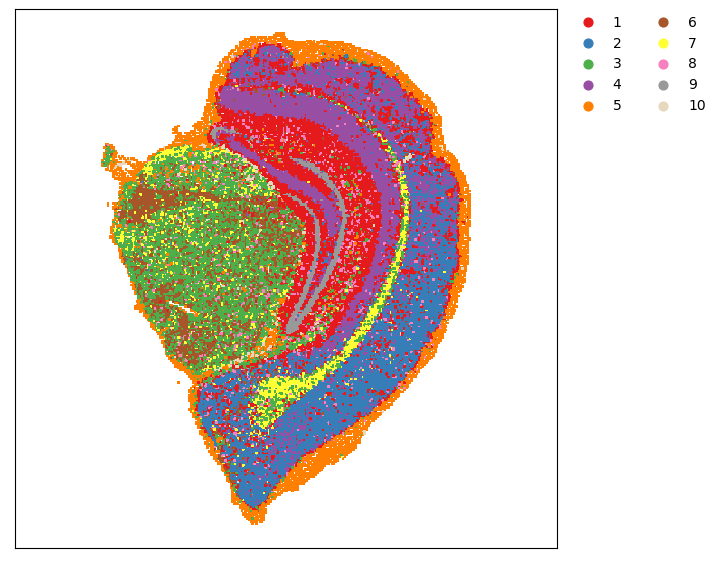

In [20]:
data.plt.cluster_scatter(res_key='leiden')

<AxesSubplot:title={'center':'leiden'}, xlabel='umap1', ylabel='umap2'>

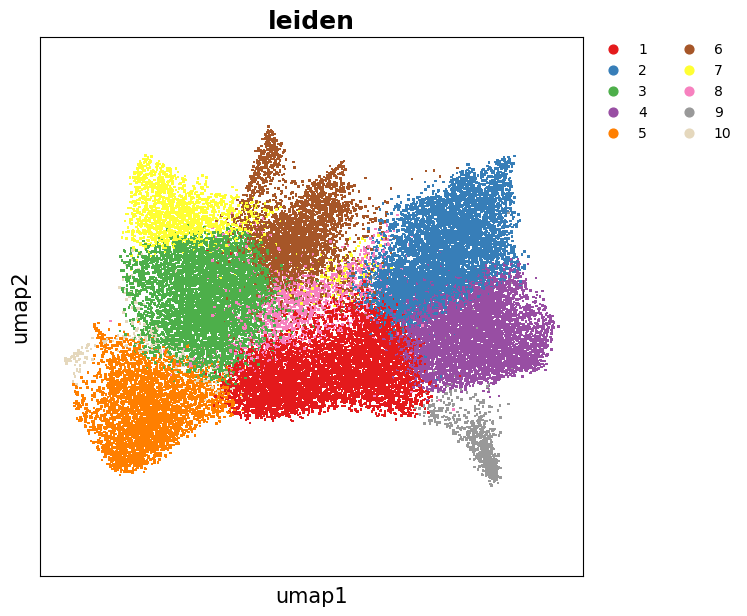

In [21]:
data.plt.umap(res_key='umap', cluster_key='leiden')

In [22]:
data.plt.interact_cluster(res_key='leiden')

Row
    [0] ParamFunction(function)
    [1] Column
        [0] ColorPicker(name='background color', value='#ffffff', width=200)
        [1] IntSlider(end=200, name='dot size', start=1, value=1, width=200)
        [2] Select(name='color theme', options=['glasbey', 'glasbey_bw', ...], value='stereo_30', width=200)
        [3] Row
            [0] Select(name='cluster', options=['1', '2', '3', ...], value='1', width=100)
            [1] ColorPicker(name='node color', value='#E41A1C', width=70)

# Phenograph

## Find Marker Genes

[2023-01-13 15:16:56][Stereo][222455][140144955553600][st_pipeline][40][INFO]: start to run phenograph...


Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 23.946834325790405 seconds
Jaccard graph constructed in 3.6364641189575195 seconds
Running Leiden optimization
Leiden completed in 5.605062484741211 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 35.80508875846863 seconds


[2023-01-13 15:17:32][Stereo][222455][140144955553600][st_pipeline][43][INFO]: phenograph end, consume time 35.8187s.


<AxesSubplot:>

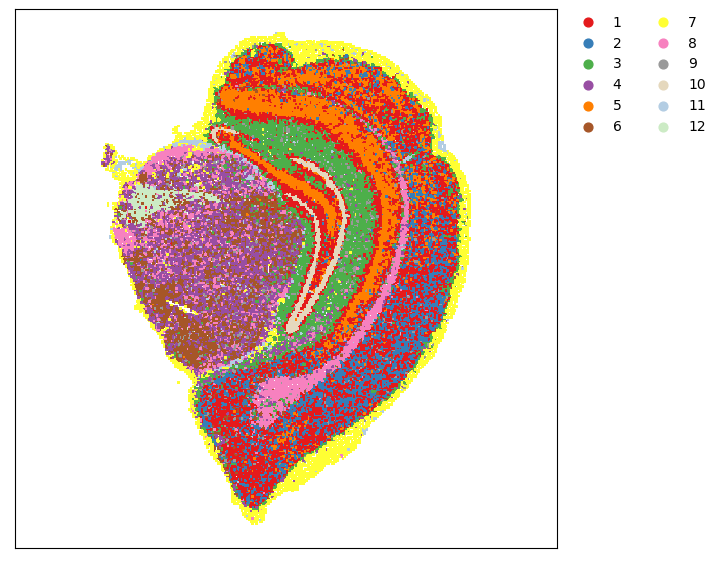

In [26]:
data.tl.phenograph(phenograph_k=30, pca_res_key='pca', res_key='phenograph')
data.plt.cluster_scatter(res_key='phenograph')

# Find Marker Genes

In [23]:
data.tl.find_marker_genes(cluster_res_key='leiden', method='t_test', use_highly_genes=False, use_raw=True)

[2023-01-13 15:11:21][Stereo][222455][140144955553600][st_pipeline][40][INFO]: start to run find_marker_genes...
[2023-01-13 15:11:21][Stereo][222455][140144955553600][tool_base][117][INFO]: read group information, grouping by group column.
[2023-01-13 15:11:21][Stereo][222455][140144955553600][tool_base][155][INFO]: start to run...
Find marker gene:   0%|          | 0/10 [00:00<?, ?it/s][2023-01-13 15:11:22][Stereo][222455][140144955553600][find_markers][119][INFO]: start to select group
[2023-01-13 15:11:28][Stereo][222455][140144955553600][find_markers][122][INFO]: end selelct group
Find marker gene:  10%|█         | 1/10 [00:11<01:47, 12.00s/it][2023-01-13 15:11:34][Stereo][222455][140144955553600][find_markers][119][INFO]: start to select group
[2023-01-13 15:11:41][Stereo][222455][140144955553600][find_markers][122][INFO]: end selelct group
Find marker gene:  20%|██        | 2/10 [00:25<01:43, 12.89s/it][2023-01-13 15:11:48][Stereo][222455][140144955553600][find_markers][119][INF

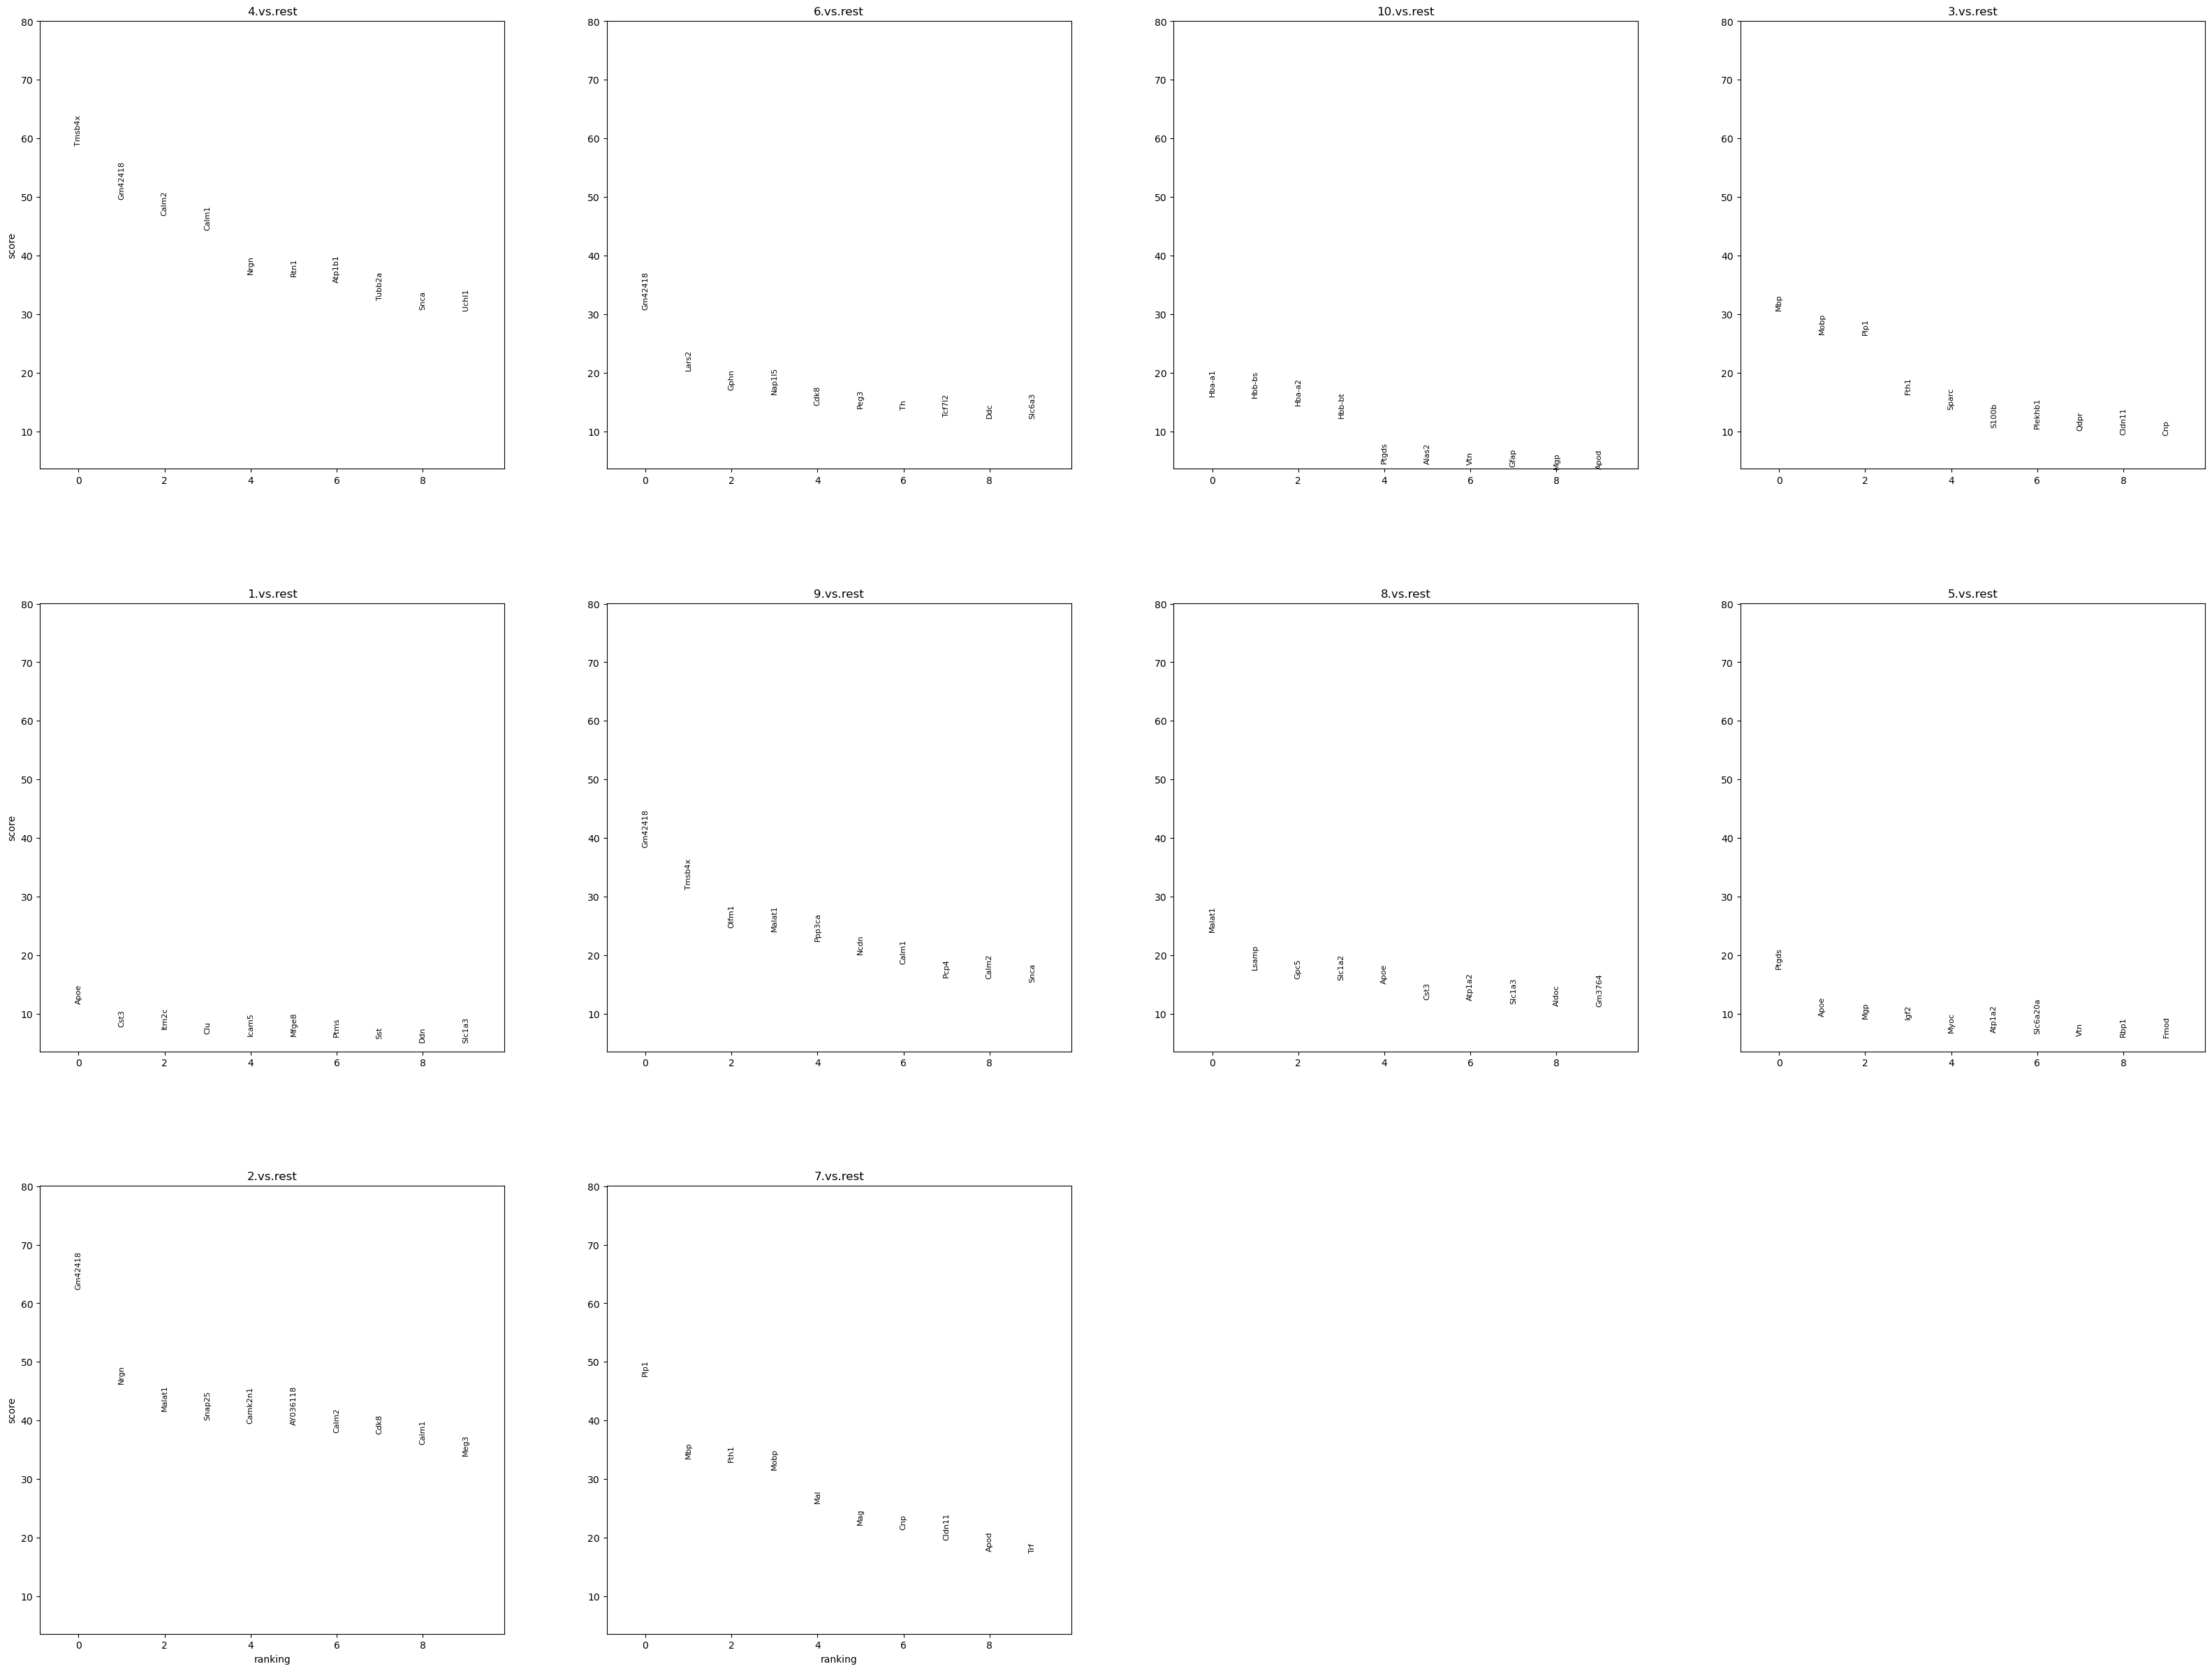

In [24]:
data.plt.marker_genes_text(res_key='marker_genes', markers_num=10, sort_key='scores')

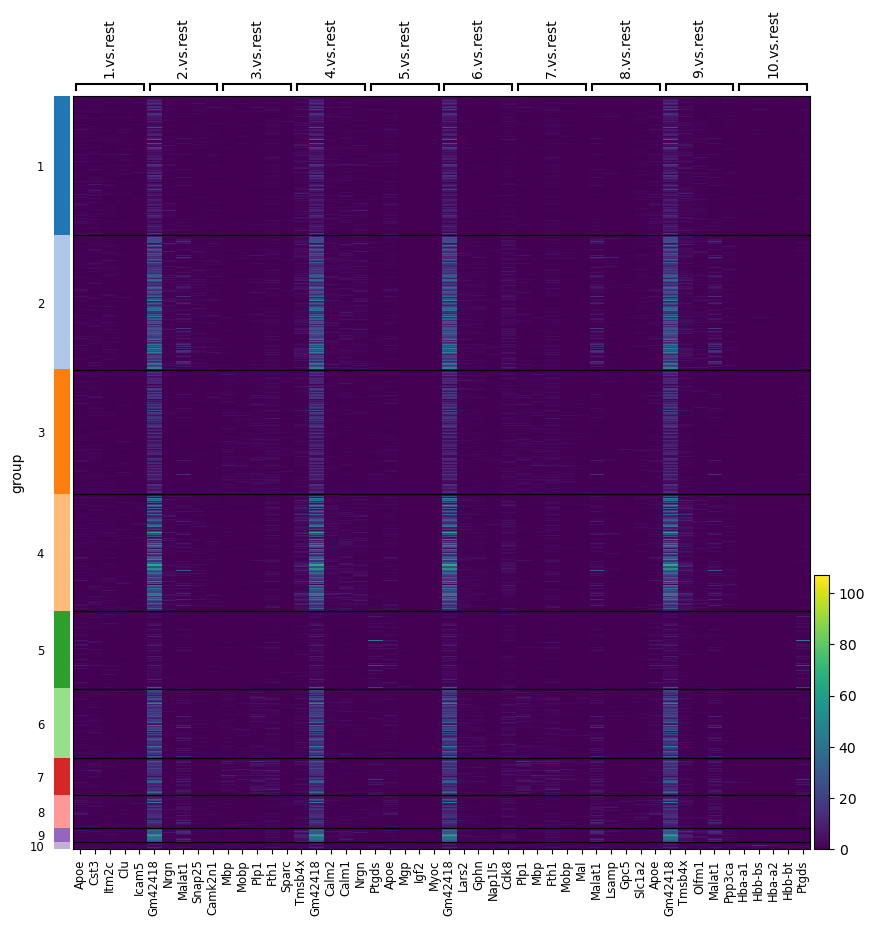

In [25]:
data.plt.marker_genes_heatmap(res_key='marker_genes', cluster_res_key='leiden', do_log=False)

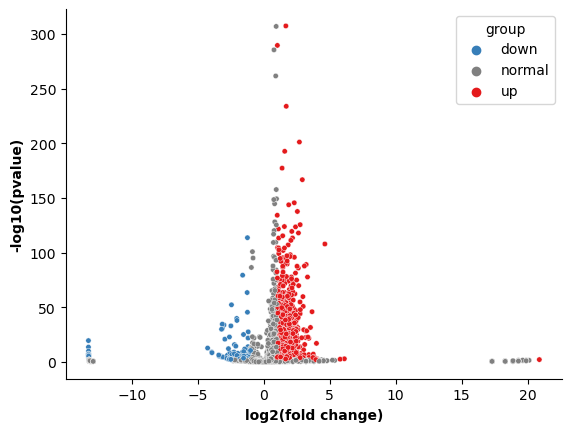

In [27]:
data.plt.marker_gene_volcano(group_name='2.vs.rest', vlines=False)

In [30]:
# Not working



# annotation_information = {
#     '1':'a',
#     '2':'b',
#     '3':'c',
#     '4':'d',
#     '5':'e',
#     '6':'f',
#     '7':'g',
#     '8':'h',
#     '9':'i',
#     '10':'j',
#     '11':'k',
#     '12':'l'
# }
# data.tl.annotation(annotation_information=annotation_information, cluster_res_key='leiden', res_key='anno_leiden')

# data.plt.cluster_scatter(res_key='anno_leiden')

